In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо потрібні змінні з датасету
# Read the required variables from the dataset
df = pd.read_csv('amazon.csv', usecols=['rating', 'actual_price', 'discount_percentage', 'product_link'])


# Приводимо дані до потрібного вигляду
# Format the data into the desired form

rating =  df['rating'].apply(pd.to_numeric, errors='coerce')
    
# Видаляємо нечислові значення (помилки зчитування)
# Remove NaN values (reading errors)
rating = rating[~np.isnan(rating)]

discount_percentage = df['discount_percentage']
for i in range(len(discount_percentage)):
    # Видаляємо символ '%' з кінця
    # Delete '%' character from the end
    discount_percentage[i] = discount_percentage[i].strip('%')
# Форматуємо в числовий тип (нечислові значення видаляємо)
# Format into a numeric type (delete non-numeric data)
discount_percentage = discount_percentage.apply(pd.to_numeric, errors='coerce')     

actual_price = df['actual_price']
for i in range(len(actual_price)):
    actual_price[i] = actual_price[i].replace(',', '').strip('₹')
actual_price = actual_price.apply(pd.to_numeric, errors='coerce')

# Draw density plots

A density plot is a graphical representation of the distribution of a dataset.

## Rating

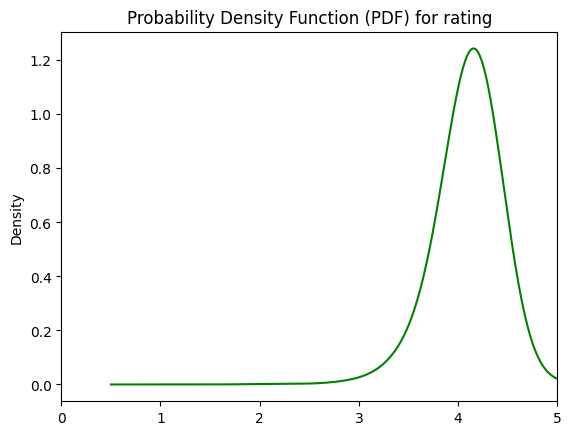

In [151]:
rating.plot(kind = 'density', color='green', bw_method=0.7)
plt.title('Probability Density Function (PDF) for rating')
plt.xlim(0, 5)
plt.show()

## Actual Price

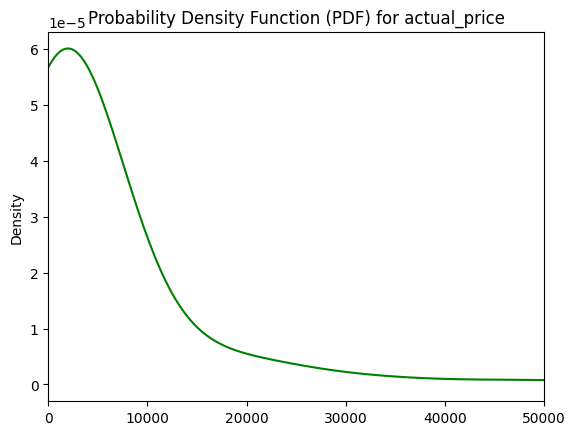

In [152]:
actual_price.plot(kind = 'density', color='green', bw_method=0.5)
plt.title('Probability Density Function (PDF) for actual_price')
plt.xlim(0, 50000)
plt.show()

## Discount percentage

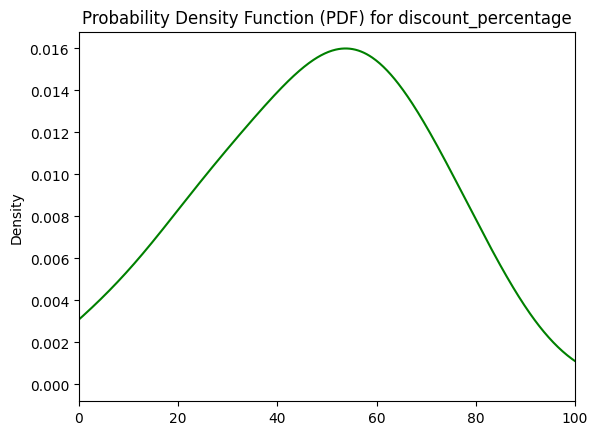

In [153]:
discount_percentage.plot(kind = 'density', color='green', bw_method=0.5)
plt.title('Probability Density Function (PDF) for discount_percentage')
plt.xlim(0, 100)
plt.show()

# Draw Frequency Polygons

A frequency polygon is a graph that shows the frequencies of grouped data. It is a type of<br>
frequency diagram that plots the midpoints of the class intervals against the frequencies<br>
and then joins up the points with straight lines.

## Rating

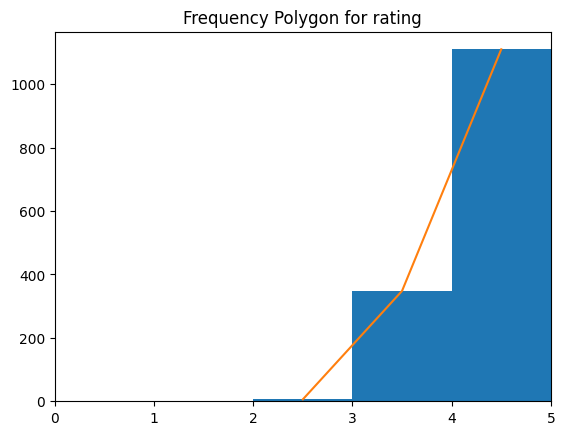

In [154]:
bins_count = 3
counts, bins = np.histogram(rating, bins=bins_count)
plt.title('Frequency Polygon for rating')
plt.xlim(0, 5)
plt.hist(rating, bins=bins_count)
plt.plot(bins[:-1]+0.5, counts)

## Actual Price

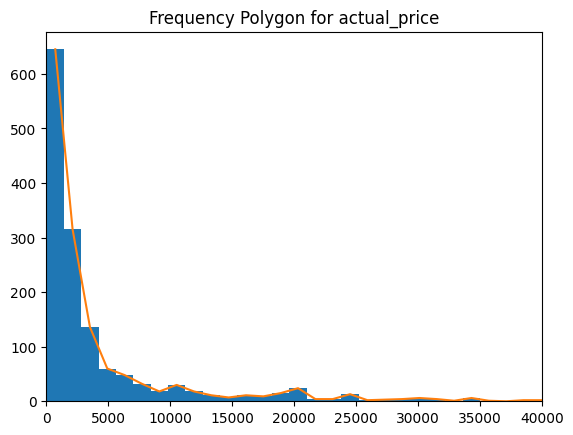

In [155]:
bins_count = 100
counts, bins = np.histogram(actual_price, bins=bins_count)
plt.title('Frequency Polygon for actual_price')
plt.xlim(0, 40000)
plt.hist(actual_price, bins=bins_count)
plt.plot(bins[:-1]+actual_price.max()/(bins_count*2), counts)

## Discount Percentage

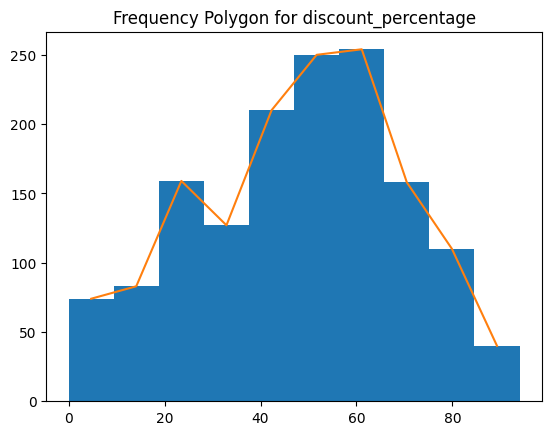

In [156]:
bins_count = 10
counts, bins = np.histogram(discount_percentage, bins=bins_count)
plt.title('Frequency Polygon for discount_percentage')
plt.hist(discount_percentage, bins=bins_count)
plt.plot(bins[:-1] + discount_percentage.max()/(bins_count*2), counts)

# Draw BoxPlots

Boxplots (also known as box-and-whisker plots) are graphical representations of numerical data<br>
 that display the median, quartiles, and range of a dataset. Boxplots provide a summary of the distribution<br>
 of a dataset and help identify outliers.

In [157]:
# Фунція для отримання даних іх "Скриньки з Вусами"
# Function to get data from BoxPlot
def boxplot_info(boxplot):
    median = boxplot['medians'][0].get_ydata()[0]
    q1 = boxplot['whiskers'][0].get_ydata()[0]
    q3 = boxplot['whiskers'][1].get_ydata()[0]
    minimum = boxplot['caps'][0].get_ydata()[0]
    maximum = boxplot['caps'][1].get_ydata()[0]
    return {'min': minimum, 'Q1' : q1, 'median' :median, 'Q2' : median, 'Q3': q3, 'max' : maximum}

## Actual Price

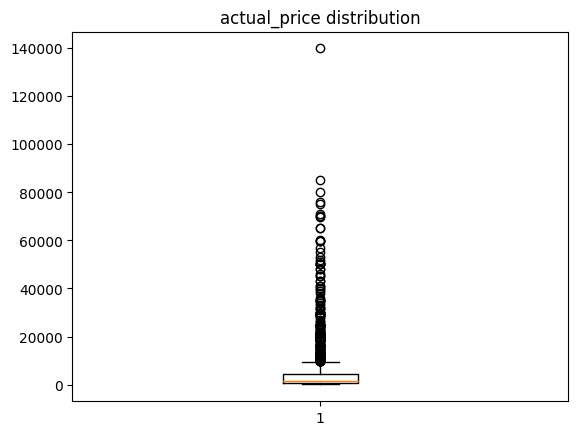

In [158]:
boxplot = plt.boxplot(actual_price)
plt.title('actual_price distribution')
plt.show()

### Minimum, Maximum and Median

In [159]:
info = boxplot_info(boxplot)

pd.DataFrame([[info['min'], info['median'], info['max']]], columns=['Min', 'Median','Max'], index=['actual_price'])

,Min,Median,Max
actual_price,39.0,1650.0,9499.0


### Quantiles

In [160]:
pd.DataFrame([info['Q1'], info['Q2'], info['Q3']], ['Q1', 'Q2', 'Q3'], columns=['Quantile'])

,Quantile
Q1,800.0
Q2,1650.0
Q3,4295.0


### Get rid of outliers

In [161]:
# Функція для пошуку найбільшого та найменшого спостережень, які не є викидами 
# Function to find the largest and smallest observations that are not outliers
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_Fence = Q1 - (1.5 * IQR)
    upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<upper_Fence])
    l = min(x[x>lower_Fence])
    return [u,l]

Before: 1465
After: 1465


{'whiskers': [<matplotlib.lines.Line2D at 0x29aebcd47f0>,
 'caps': [<matplotlib.lines.Line2D at 0x29aebcd4d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x29aebcd4550>],
 'medians': [<matplotlib.lines.Line2D at 0x29aebcd5270>],
 'fliers': [<matplotlib.lines.Line2D at 0x29aebcd5510>],
 'means': []}

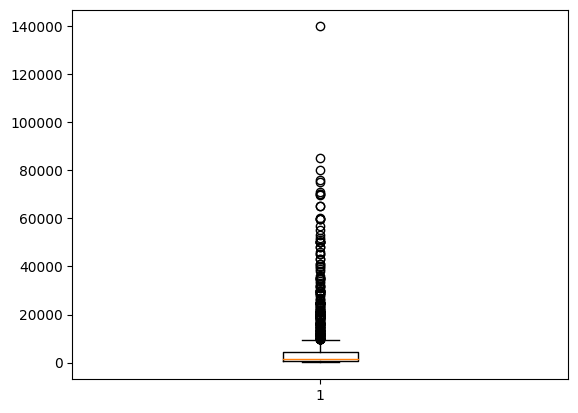

In [162]:
# Позбудемося викидів
# Get rid of outliers
max_p, min_p = iqr_fence(actual_price)
print("Before: " + str(actual_price.count()))
#actual_price = actual_price[(actual_price >= min_p) & (actual_price <= max_p)]
print("After: " + str(actual_price.count()))

plt.boxplot(actual_price)

## Rating

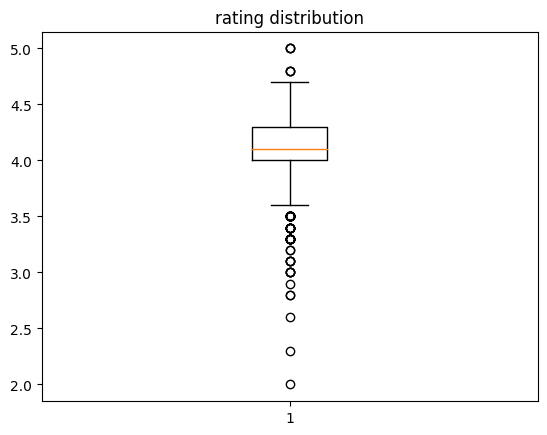

In [163]:
boxplot = plt.boxplot(rating)
plt.title('rating distribution')
plt.show()

### Minimum, Maximum and Median

In [164]:
info = boxplot_info(boxplot)

pd.DataFrame([[info['min'], info['median'], info['max']]], columns=['Min', 'Median','Max'], index=['rating'])

,Min,Median,Max
rating,3.6,4.1,4.7


### Quantiles

In [165]:
pd.DataFrame([info['Q1'], info['Q2'], info['Q3']], ['Q1', 'Q2', 'Q3'], columns=['Quantile'])

,Quantile
Q1,4.0
Q2,4.1
Q3,4.3


### Get rid of outliers

Before: 1464
After: 1464
Before: 1465
After: 1465
Before: 1465
After: 1465


{'whiskers': [<matplotlib.lines.Line2D at 0x29aebde01c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29aebde0700>,
 'boxes': [<matplotlib.lines.Line2D at 0x29aebda3eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x29aebde0c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x29aebde0ee0>],
 'means': []}

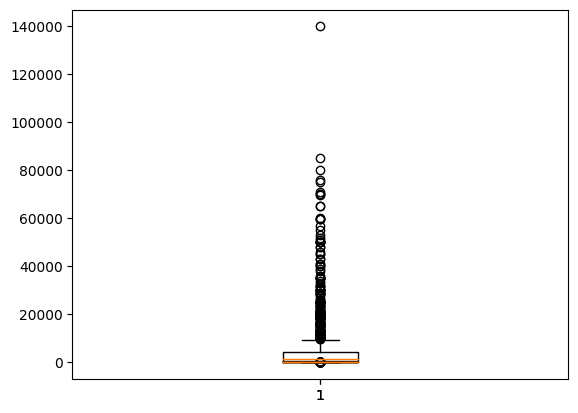

In [166]:
# Позбудемося викидів
# Get rid of outliers
max_r, min_r = iqr_fence(rating)
print("Before: " + str(rating.count()))
#rating = rating[(rating >= min_r) & (rating <= max_r)]
print("After: " + str(rating.count()))

plt.boxplot(rating)

# Позбудемося викидів
# Get rid of outliers
max_r, min_r = iqr_fence(discount_percentage)
print("Before: " + str(discount_percentage.count()))
#discount_percentage = discount_percentage[(discount_percentage >= min_r) & (discount_percentage <= max_r)]
print("After: " + str(discount_percentage.count()))

plt.boxplot(discount_percentage)

# Позбудемося викидів
# Get rid of outliers
max_r, min_r = iqr_fence(actual_price)
print("Before: " + str(actual_price.count()))
#actual_price = actual_price[(actual_price >= min_r) & (actual_price <= max_r)]
print("After: " + str(actual_price.count()))

plt.boxplot(actual_price)



## Discount Percentage

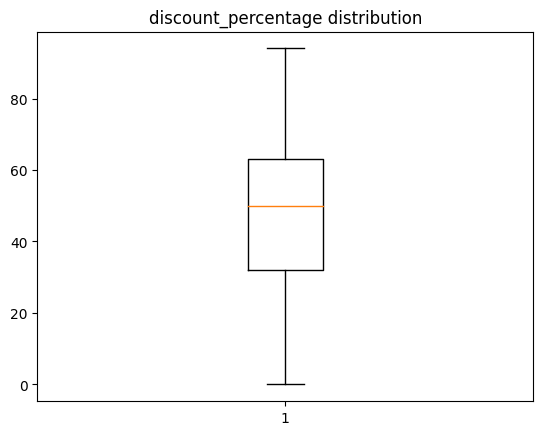

In [167]:
boxplot = plt.boxplot(discount_percentage)
plt.title('discount_percentage distribution')
plt.show()

### Minimum, Maximum and Median

In [168]:
info = boxplot_info(boxplot)

pd.DataFrame([[info['min'], info['median'], info['max']]], columns=['Min', 'Median','Max'], index=['discount_percentage'])

,Min,Median,Max
discount_percentage,0,50.0,94


### Quantiles

In [169]:
pd.DataFrame([info['Q1'], info['Q2'], info['Q3']], ['Q1', 'Q2', 'Q3'], columns=['Quantile'])

,Quantile
Q1,32.0
Q2,50.0
Q3,63.0


# Minimum, Maximum, Median, Quantiles, Deciles

In [170]:
def quantiles(x):
    Q1 = x.quantile(0.25)
    Q2 = x.quantile(0.50)
    Q3 = x.quantile(0.75)
    return [Q1, Q2, Q3]

def deciles(x):
    D1 = x.quantile(0.1)
    D2 = x.quantile(0.2)
    D3 = x.quantile(0.3)
    D4 = x.quantile(0.4)
    D5 = x.quantile(0.5)
    D6 = x.quantile(0.6)
    D7 = x.quantile(0.7)
    D8 = x.quantile(0.8)
    D9 = x.quantile(0.9)
    return [D1, D2, D3, D4, D5, D6, D7, D8, D9]

## Actual Price

### Minimum, Maximum and Median

In [171]:
pd.DataFrame([[actual_price.min(), actual_price.median(), actual_price.max()]], columns=['Min', 'Median','Max'], index=['actual_price'])

,Min,Median,Max
actual_price,39.0,1650.0,139900.0


### Quantiles

In [172]:
pd.DataFrame(quantiles(actual_price), ['Q1', 'Q2','Q3'], columns=['Quantile'])

,Quantile
Q1,800.0
Q2,1650.0
Q3,4295.0


### Deciles

In [173]:
pd.DataFrame(deciles(actual_price), ['D1', 'D2','D3','D4','D5','D6','D7','D8','D9'], columns=['Decile'])

,Decile
D1,496.6
D2,699.0
D3,999.0
D4,1199.0
D5,1650.0
D6,2198.4
D7,3471.6
D8,5999.0
D9,14999.0


## Rating

### Minimum, Maximum and Median

In [174]:
pd.DataFrame([[rating.min(), rating.median(), rating.max()]], columns=['Min', 'Median','Max'], index=['rating'])

,Min,Median,Max
rating,2.0,4.1,5.0


### Quantiles

In [175]:
pd.DataFrame(quantiles(rating), ['Q1', 'Q2','Q3'], columns=['Quantile'])

,Quantile
Q1,4.0
Q2,4.1
Q3,4.3


### Deciles

In [176]:
pd.DataFrame(deciles(rating), ['D1', 'D2','D3','D4','D5','D6','D7','D8','D9'], columns=['Decile'])

,Decile
D1,3.8
D2,3.9
D3,4.0
D4,4.1
D5,4.1
D6,4.2
D7,4.3
D8,4.3
D9,4.4


## Discount Percentage

### Minimum, Maximum and Median

In [177]:
pd.DataFrame([[discount_percentage.min(), discount_percentage.median(), discount_percentage.max()]], columns=['Min', 'Median','Max'], index=['discount_percentage'])

,Min,Median,Max
discount_percentage,0,50.0,94


### Quantiles

In [178]:
pd.DataFrame(quantiles(discount_percentage), ['Q1', 'Q2','Q3'], columns=['Quantile'])

,Quantile
Q1,32.0
Q2,50.0
Q3,63.0


### Deciles

In [179]:
pd.DataFrame(deciles(discount_percentage), ['D1', 'D2','D3','D4','D5','D6','D7','D8','D9'], columns=['Decile'])

,Decile
D1,18.0
D2,28.0
D3,37.0
D4,43.0
D5,50.0
D6,55.0
D7,60.0
D8,66.0
D9,76.0


# Characteristics of the position of the center of the variable values

In [180]:
from scipy import stats

def trimean(x):
    Q1, Q2, Q3 = quantiles(x)
    trimean = (Q1 + 2 * x.median() + Q3) / 4
    return trimean

def variation_coefficient(x):
    return x.std()/x.mean() * 100

## Actual Price

In [181]:
data = [actual_price.mean(), stats.gmean(actual_price), stats.hmean(actual_price), stats.mode(actual_price, keepdims=False)[0], actual_price.median(), trimean(actual_price)]
rows = ['Mean', 'Geometric Mean', 'Harmonic Mean', 'Mode', 'Median', 'Trimean']

pd.DataFrame(data, rows, columns=['actual_price'])

,actual_price
Mean,5444.990635
Geometric Mean,2008.764366
Harmonic Mean,952.312886
Mode,999.000000
Median,1650.000000
Trimean,2098.750000


## Rating

In [182]:
data = [rating.mean(), stats.gmean(rating), stats.hmean(rating), stats.mode(rating, keepdims=False)[0], rating.median(), trimean(rating)]
rows = ['Mean', 'Geometric Mean', 'Harmonic Mean', 'Mode', 'Median', 'Trimean']

pd.DataFrame(data, rows, columns=['rating'])

,rating
Mean,4.096585
Geometric Mean,4.085348
Harmonic Mean,4.072960
Mode,4.100000
Median,4.100000
Trimean,4.125000


## Discount Persentage

In [183]:
# Ігноруємо нульові значення (для середнього геометричного та гармонічного)
# Ignore zero values (for geometric and harmonic mean)
non_zero_discount_percentage = [i for i in discount_percentage if i != 0]

data = [discount_percentage.mean(), stats.gmean(non_zero_discount_percentage), stats.hmean(non_zero_discount_percentage), stats.mode(discount_percentage, keepdims=False)[0], discount_percentage.median(), trimean(discount_percentage)]
rows = ['Mean', 'Geometric Mean', 'Harmonic Mean', 'Mode', 'Median', 'Trimean']

pd.DataFrame(data, rows, columns=['discount_percentage'])

,discount_percentage
Mean,47.691468
Geometric Mean,43.835747
Harmonic Mean,35.186329
Mode,50.000000
Median,50.000000
Trimean,48.750000


# Characteristics of the scattering of variable values

## Actual Price

In [184]:
confidence_interval = stats.norm.interval(confidence=0.99, loc=actual_price.mean(), scale=stats.sem(actual_price))

data = [actual_price.var(), actual_price.std(), variation_coefficient(actual_price), stats.iqr(actual_price) / 2, actual_price.max() - actual_price.min(), confidence_interval]
rows = ['Variance', 'Standard Deviation', 'Coefficient of Variation', 'Semi-Interquartile range', 'Range', 'Confidence Interval']
    
pd.DataFrame(data, rows, columns=['actual_price'])

,actual_price
Variance,118261859.322503
Standard Deviation,10874.826864
Coefficient of Variation,199.721682
Semi-Interquartile range,1747.5
Range,139861.0
Confidence Interval,"(4713.143092710734, 6176.83817691384)"


## Rating

In [185]:
confidence_interval = stats.norm.interval(confidence=0.99, loc=rating.mean(), scale=stats.sem(rating))

data = [rating.var(), rating.std(), variation_coefficient(rating), stats.iqr(rating) / 2, rating.max() - rating.min(), confidence_interval]
rows = ['Variance', 'Standard Deviation', 'Coefficient of Variation', 'Semi-Interquartile range', 'Range', 'Confidence Interval']
pd.DataFrame(data, rows, columns=['rating'])

,rating
Variance,0.085074
Standard Deviation,0.291674
Coefficient of Variation,7.119933
Semi-Interquartile range,0.15
Range,3.0
Confidence Interval,"(4.076949090381394, 4.11622030852571)"


## Discount Percentage

In [186]:
confidence_interval = stats.norm.interval(confidence=0.99, loc=discount_percentage.mean(), scale=stats.sem(discount_percentage))

data = [discount_percentage.var(), discount_percentage.std(), variation_coefficient(discount_percentage), stats.iqr(discount_percentage) / 2, discount_percentage.max() - discount_percentage.min(), confidence_interval]
rows = ['Variance', 'Standard Deviation', 'Coefficient of Variation', 'Semi-Interquartile range', 'Range', 'Confidence Interval']
pd.DataFrame(data, rows, columns=['discount_percentage'])

,discount_percentage
Variance,468.112393
Standard Deviation,21.635905
Coefficient of Variation,45.366407
Semi-Interquartile range,15.5
Range,94
Confidence Interval,"(46.23542747374112, 49.1475076798425)"


# Analysis of the skewness and kurtosis of the distribution

## Actual Price

In [187]:
pd.DataFrame([stats.skew(actual_price), stats.kurtosis(actual_price)], ['Skewness', 'Kurtosis'], columns=['actual_price'])

,actual_price
Skewness,4.555209
Kurtosis,29.617642


## Rating

In [188]:
pd.DataFrame([stats.skew(rating), stats.kurtosis(rating)], ['Skewness', 'Kurtosis'], columns=['rating'])

,rating
Skewness,-1.241622
Kurtosis,4.340549


## Discount Persentage

In [189]:
pd.DataFrame([stats.skew(discount_percentage), stats.kurtosis(discount_percentage)], ['Skewness', 'Kurtosis'], columns=['discount_percentage'])

,discount_percentage
Skewness,-0.290234
Kurtosis,-0.582841


# Test for normal distribution

In [190]:
import statsmodels.api as sm

## Actual Price

### QQ-plot

Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing<br> two probability distributions by plotting their quantiles against each other.

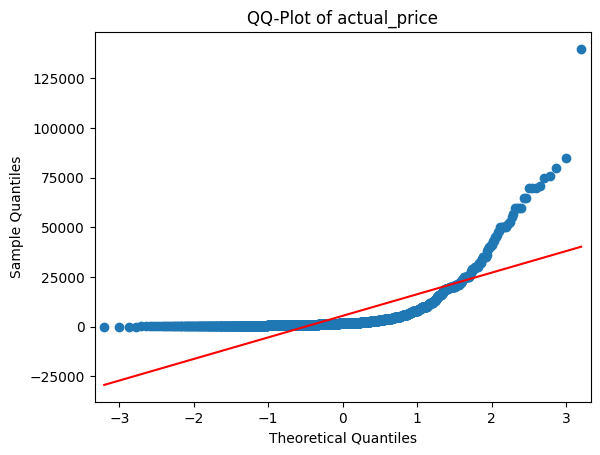

In [191]:
fig = sm.qqplot(actual_price, line='s')

plt.title('QQ-Plot of actual_price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Kolmogorov-Smirnov (KS) test

In [192]:
kstest = stats.kstest(actual_price, 'norm')

# Print the test statistic and p-value
print('KS test statistic:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistic: 1.0
KS test p-value: 0.00000


## Rating

### QQ-plot

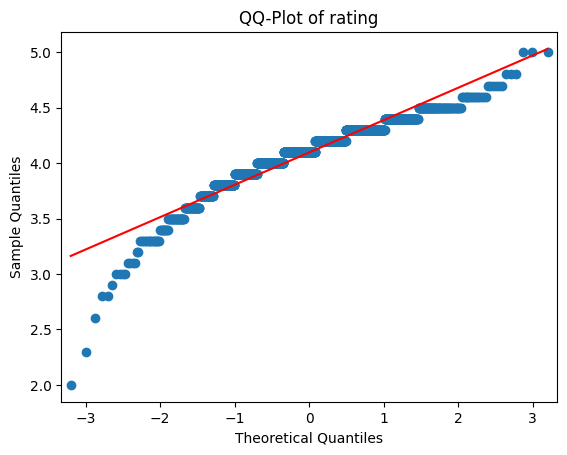

In [193]:
fig = sm.qqplot(rating, line='s')

plt.title('QQ-Plot of rating')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Kolmogorov-Smirnov (KS) test

In [194]:

kstest = stats.kstest(rating, 'norm')

# Print the test statistic and p-value
print('KS test statistic:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistic: 0.9953956893417032
KS test p-value: 0.00000


## Discount Percentage

### QQ-plot

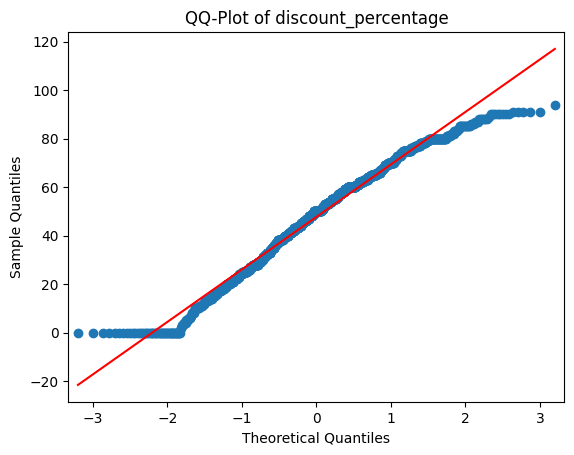

In [195]:
fig = sm.qqplot(discount_percentage, line='s')

plt.title('QQ-Plot of discount_percentage')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Kolmogorov-Smirnov (KS) test

In [196]:
kstest = stats.kstest(discount_percentage, 'norm')

# Print the test statistic and p-value
print('KS test statistic:', kstest.statistic)
print('KS test p-value: {:.5f}'.format(kstest.pvalue))

KS test statistic: 0.9638378152789501
KS test p-value: 0.00000


# Other Tests

## Test Actual Price for Log-Norman Distribution

### QQ-Test

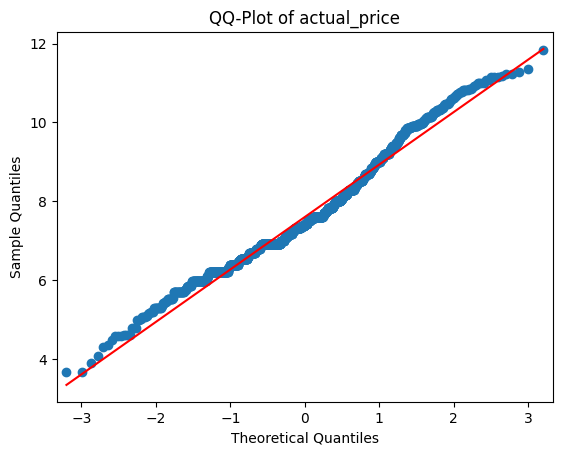

In [197]:
fig = sm.qqplot(np.log(actual_price), line='s')

plt.title('QQ-Plot of actual_price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [198]:
kstest = stats.shapiro(np.log(actual_price))

# Print the test statistic and p-value
print('Statistics=%.3f, p=%.3f' % (kstest.statistic, kstest.pvalue))

Statistics=0.977, p=0.000


In [199]:
id = rating.idxmax()
